In [1]:
#necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
import datetime
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tqdm import tqdm
#import cv2
#import PIL.Image
import matplotlib 
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import shutil
import posixpath
import sys 
import glob
#import wfdb
import pandas as pd
import math
#from PIL import Image

In [6]:
import tensorflow as tf
from tensorflow import keras
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras import layers, saving
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam, SGD
import numpy as np
from keras.models import Sequential

In [7]:
tf.compat.v1.ConfigProto( device_count = {'GPU': 1 , 'CPU': 10})

device_count {
  key: "CPU"
  value: 10
}
device_count {
  key: "GPU"
  value: 1
}

In [44]:
##load model
loaded_model = keras.saving.load_model('./models/resnet50_multiple_channel_model.keras')

In [116]:
img_path = 'sample_ecg_1089.png'
img = keras.utils.load_img(img_path, target_size=(224, 224))
x = keras.utils.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = loaded_model.predict(x, batch_size=32)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', preds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step
Predicted: [[1.0091747e-37 8.7429252e-35 1.7267054e-15 1.4166500e-27 0.0000000e+00
  0.0000000e+00 0.0000000e+00 2.5575683e-37 1.0000000e+00 2.0013872e-37
  0.0000000e+00 3.4696354e-37 0.0000000e+00 0.0000000e+00 7.4498863e-36]]


In [118]:
img_path = 'sample_ecg_0.png'
img = keras.utils.load_img(img_path, target_size=(224, 224, 3))
x = keras.utils.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = loaded_model.predict(x, batch_size=32)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', preds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step
Predicted: [[9.7047877e-34 1.2910215e-27 1.6091647e-16 3.9707758e-19 0.0000000e+00
  0.0000000e+00 0.0000000e+00 3.8653653e-27 1.0000000e+00 3.9208145e-29
  0.0000000e+00 8.6078842e-32 0.0000000e+00 4.3769040e-37 1.7045988e-29]]


In [119]:
img_path = './ptb_ecg_filtered/train_multi/Healthy control/948_multiple_ Healthy control.png'
img = keras.utils.load_img(img_path, target_size=(224, 224))
x = keras.utils.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = loaded_model.predict(x, batch_size=32)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', preds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
Predicted: [[0.0000000e+00 1.7003404e-34 9.2071768e-28 1.1895526e-21 0.0000000e+00
  0.0000000e+00 0.0000000e+00 4.7863273e-27 1.0000000e+00 4.1757647e-32
  0.0000000e+00 5.7787904e-34 2.3793084e-38 0.0000000e+00 7.7073503e-32]]


In [123]:
img_path = './ptb_ecg_filtered/train_multi/Myocardial Infarction/16_multiple_ Myocardial infarction.png'
img = keras.utils.load_img(img_path, target_size=(224, 224))
x = keras.utils.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = loaded_model.predict(x, batch_size=32)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', preds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
Predicted: [[0.0000000e+00 0.0000000e+00 1.9870746e-25 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]]


In [136]:
img_path = './ptb_ecg_filtered/train_multi/Healthy control/949_multiple_ Healthy control.png'
img = keras.utils.load_img(img_path, target_size=(224, 224))
x = keras.utils.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = loaded_model.predict(x, batch_size=32)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', preds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
Predicted: [[0.0000000e+00 1.7003404e-34 9.2071768e-28 1.1895526e-21 0.0000000e+00
  0.0000000e+00 0.0000000e+00 4.7863273e-27 1.0000000e+00 4.1757647e-32
  0.0000000e+00 5.7787904e-34 2.3793084e-38 0.0000000e+00 7.7073503e-32]]


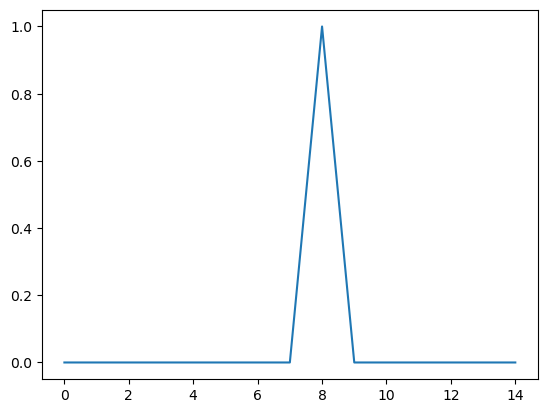

In [137]:
from matplotlib import pyplot as plt
plt.plot(preds[0])

In [134]:
img_path = './ptb_ecg_filtered/train_multi/Myocardial Infarction/9_multiple_ Myocardial infarction.png'
img = keras.utils.load_img(img_path, target_size=(224, 224))
x = keras.utils.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = loaded_model.predict(x, batch_size=32)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', preds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
Predicted: [[6.2679515e-37 6.9783599e-38 4.1920748e-14 1.2539454e-24 5.6159529e-33
  0.0000000e+00 2.1581786e-37 1.2888353e-37 1.0000000e+00 0.0000000e+00
  0.0000000e+00 1.1950344e-34 0.0000000e+00 0.0000000e+00 2.3847110e-26]]


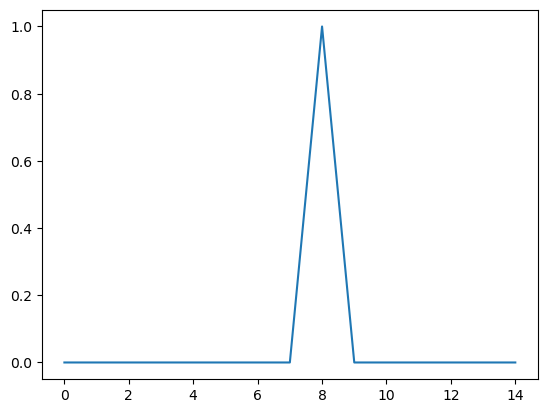

In [135]:
from matplotlib import pyplot as plt
plt.plot(preds[0])

In [127]:
img_path = './ptb_ecg_filtered/train_multi/Bundle branch block/1164_multiple_ Bundle branch block.png'
img = keras.utils.load_img(img_path, target_size=(224, 224))
x = keras.utils.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = loaded_model.predict(x, batch_size=32)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', preds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
Predicted: [[0.0000000e+00 0.0000000e+00 2.6503566e-21 3.1790779e-27 4.9160409e-36
  0.0000000e+00 3.4473655e-37 6.3377441e-31 1.0000000e+00 7.2800549e-37
  0.0000000e+00 9.3668962e-32 0.0000000e+00 0.0000000e+00 3.1520013e-29]]


In [131]:
for i in range(preds.shape[1]):
    print(preds[0][i])

0.0
0.0
2.6503566e-21
3.1790779e-27
4.916041e-36
0.0
3.4473655e-37
6.337744e-31
1.0
7.280055e-37
0.0
9.366896e-32
0.0
0.0
3.1520013e-29


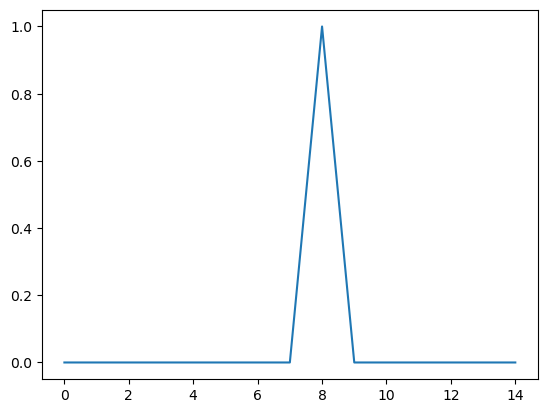

In [133]:
##plot most recent preds for bundle branch block
from matplotlib import pyplot as plt
plt.plot(preds[0])